## 回帰モデルからの推論が難しい例・特徴選択

2変数間の相関と回帰係数が異なる場合

In [4]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('iris')

In [5]:
# 線形重回帰モデルの作成
from sklearn.linear_model import LinearRegression

# sepal_width, species をDataFrameから除外し、残りを説明変数にする
X = df.drop(['sepal_width', 'species'], axis=1)

# 目的変数は sepal_width（単回帰モデルではうまく説明できなかった）
Y = df.sepal_width

# 線形回帰モデルの作成、モデルの学習
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# モデルによる予測
Y_predict = model.predict(X)

# 平均二乗誤差、決定係数を出力
print('MSE={:.3f}, R^2={:.3f}'.format(
    mean_squared_error(Y, Y_predict), r2_score(Y, Y_predict)))

MSE=0.090, R^2=0.524


単回帰より予測の精度は高い（上：MSE, 下：R^2）

<img src='slides/5_4_table_sepal_width.png'>

In [7]:
# 回帰係数
pd.DataFrame(model.coef_.reshape(1, 3), columns=X.columns, index=['sepal_width'])

,sepal_length,petal_length,petal_width
sepal_width,0.607066,-0.586032,0.55803


- sepal_length, petal_width が正の係数
- petal_length が負の係数

以下は、sepal_width と上記3つの説明変数との1対1の関係を散布図で見たもの。
- 全て負の相関となり、回帰係数の正負とは一致しない

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

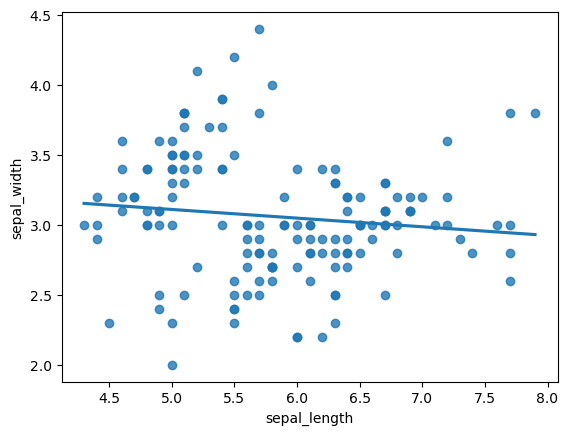

In [8]:
# sepal_length と sepal_width の関係
sns.regplot(x=df.sepal_length, y=df.sepal_width, ci=None)

<AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>

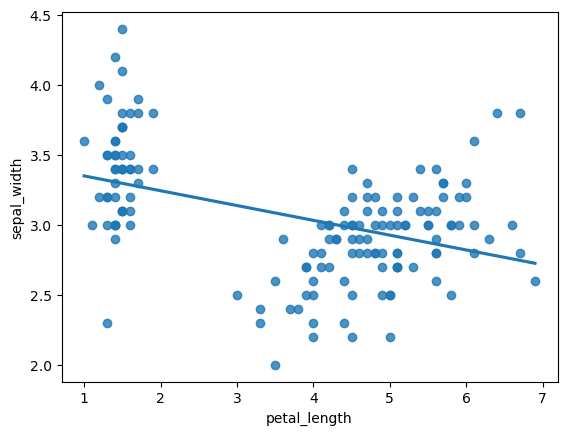

In [9]:
# petal_length と sepal_width の関係
sns.regplot(x=df.petal_length, y=df.sepal_width, ci=None)

<AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>

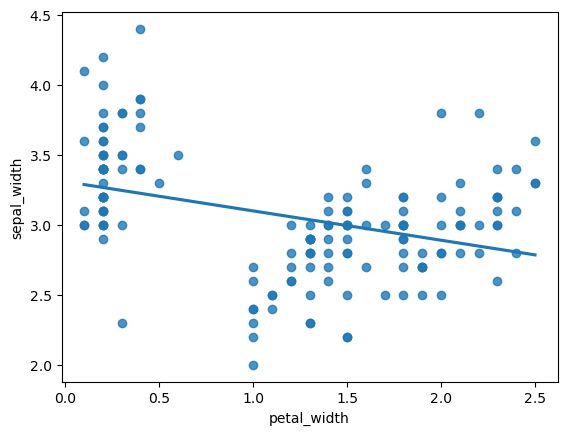

In [10]:
# petal_width と sepal_width の関係
sns.regplot(x=df.petal_width, y=df.sepal_width, ci=None)

2変数による回帰モデルでも、1対1の関係と回帰係数の正負が一致しないという傾向は変わらない

In [11]:
# 説明変数から sepal_width に加えて sepal_length, petal_length, petal_width のそれぞれを除外
for v in ['sepal_length', 'petal_length', 'petal_width']:
    X = df.drop([v] + ['sepal_width', 'species'], axis=1)
    Y = df.sepal_width
    model = LinearRegression()
    model.fit(X, Y)
    Y_predict = model.predict(X)
    print('dropped:', v)
    print('MSE={:.3f}, R^2={:.3f}'.format(
        mean_squared_error(Y, Y_predict), r2_score(Y, Y_predict)))
    print(pd.DataFrame(model.coef_.reshape(1, 2), columns=X.columns, index=['sepal_width']))
    print('----')

dropped: sepal_length
MSE=0.148, R^2=0.213
             petal_length  petal_width
sepal_width     -0.257138     0.364042
----
dropped: petal_length
MSE=0.145, R^2=0.234
             sepal_length  petal_width
sepal_width      0.289287    -0.466414
----
dropped: petal_width
MSE=0.103, R^2=0.456
             sepal_length  petal_length
sepal_width      0.561186     -0.335267
----


## 特徴選択

上記のように、適当に説明変数を選択しても、良いモデルは作るのは難しい。

### ステップワイズ法

説明変数の選択を変えながら何度もモデルを作り直す試行錯誤を、機械的に行う特徴選択アルゴリズム。<br>
結果として得られるモデルが、解釈しやすいものとは限らない。

### 学習アルゴリズム

類似の効果（回帰係数の推定値を0に近づける重みを導入）を学習アルゴリズムに組み込んだものもある。

- Lasso (L1正則化)
- リッジ回帰 (L2正則化)